# Module 8 Supervised Machine Learning Techniques on Loan Data

Yiheng Shen ys3323

This article first conducted Random Forest Model using the original dataset, then did random undersampling and random oversampling on the dataset and built Random Forest Models with the same parameters on the 2 sampled dataset respectively. Then grid search and cross validation is applied on the best model in order to get the best performance and the metrics are gains table and ROC.

## Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('XYZloan_default_selected_vars.csv')

In [3]:
pd.set_option('display.max_columns', 100)
df.head(2)

,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,AP007,AP008,AP009,TD001,TD002,TD005,TD006,TD009,TD010,TD013,TD014,TD015,TD022,TD023,TD024,TD025,TD026,TD027,TD028,TD029,TD044,TD048,TD051,TD054,TD055,TD061,TD062,CR004,CR005,CR009,CR012,CR015,CR017,CR018,CR019,PA022,PA023,PA028,PA029,PA030,PA031,CD008,CD018,CD071,CD072,CD088,CD100,CD101,CD106,CD107,CD108,CD113,CD114,CD115,CD117,CD118,CD120,CD121,CD123,CD130,CD131,CD132,CD133,CD135,CD136,CD137,CD152,CD153,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
0,0,1,1,1,31,2,1,12,2017/7/6 10:21,ios,3,3,1,1,1,4,1,5,1,14,2,2,10.0,9.0,6.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,35807,0,4,4,3,2,-1.0,-1.0,-98.0,-98.0,-98.0,-98.0,13840.0,172.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,57.0,48.0,95.0,79.0,125.0,103.0,43.0,55.0,56.0,52.0,65.0,91.0,96.0,10900.0,12757.0,8.0,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7
1,1,2,2,0,27,1,1,12,2017/4/6 12:51,h5,5,4,0,2,0,3,1,3,1,3,2,0,15.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,7254,0,6,7,6,11,-1.0,-1.0,-98.0,-98.0,-98.0,-98.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB


In [4]:
#check missing values
df.isnull().any().sum()

58

In [5]:
# compute missing values
df = df.fillna(df.mean())

### Split Data

In [4]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.40, random_state=1)

## Original Random Forest Model

In [11]:
import h2o
h2o.init()
from sklearn.model_selection import train_test_split
from h2o.estimators import H2ORandomForestEstimator

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_152-release"; OpenJDK Runtime Environment (build 1.8.0_152-release-1056-b12); OpenJDK 64-Bit Server VM (build 25.152-b12, mixed mode)
  Starting server from /Users/yihengshen/.local/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/7t/kxwj0tvn11s88d879bt0277w0000gn/T/tmpb4170e1d
  JVM stdout: /var/folders/7t/kxwj0tvn11s88d879bt0277w0000gn/T/tmpb4170e1d/h2o_yihengshen_started_from_python.out
  JVM stderr: /var/folders/7t/kxwj0tvn11s88d879bt0277w0000gn/T/tmpb4170e1d/h2o_yihengshen_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,1 month and 5 days
H2O_cluster_name:,H2O_from_python_yihengshen_1jagcj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.778 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [19]:
train_hex = h2o.H2OFrame(train)
test_hex = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [5]:
predictors = ['AP001', 'AP002', 'AP003', 'AP004', 'AP005', 'AP006', 'AP007', 'AP008', 
              'AP009', 'TD001', 'TD002', 'TD005', 'TD006', 'TD009', 'TD010', 'TD013',
              'TD014', 'TD015', 'TD022', 'TD023', 'TD024', 'TD025', 'TD026', 'TD027',
              'TD028', 'TD029', 'TD044', 'TD048', 'TD051', 'TD054', 'TD055', 'TD061',
              'TD062', 'CR004', 'CR005', 'CR009', 'CR012', 'CR015', 'CR017', 'CR018',
              'CR019', 'PA022', 'PA023', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008',
              'CD018', 'CD071', 'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107',
              'CD108', 'CD113', 'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121',
              'CD123', 'CD130', 'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137',
              'CD152', 'CD153', 'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169',
              'CD170', 'CD172', 'CD173', 'MB005', 'MB007']
target = "loan_default"

In [33]:
rf_v1 = H2ORandomForestEstimator(
        model_id = 'rf_v1',
        ntrees = 300,
        nfolds=10,
        min_rows=100,
        seed=1234)
rf_v1.train(predictors,target,training_frame=train_hex)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [13]:
def ROC_LIFT(my_result,df,target):
    from sklearn.metrics import roc_curve,auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt
    
    # ROC
    y_actual = df[target].as_data_frame()
    y_pred = my_result.predict(df).as_data_frame()
    fpr = list()
    tpr = list()
    roc_auc = list()
    fpr,tpr,_ = roc_curve(y_actual,y_pred)
    roc_auc = auc(fpr,tpr)

    # plotting
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (aare=%0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=3,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: AUC={0:0.4f}'.format(roc_auc))
    plt.legend(loc='lower right')
    
    #LIFT Table
    predictions = my_result.predict(test_hex)
    test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()

    #sort on prediction (descending), add id, and decile for groups containing 1/10 of datapoints
    test_scores = test_scores.sort_values(by='predict',ascending=False)
    test_scores['row_id'] = range(0,0+len(test_scores))
    test_scores['decile'] = ( test_scores['row_id'] / (len(test_scores)/10) ).astype(int)
    #see count by decile
    test_scores.loc[test_scores['decile'] == 10]=9
    test_scores['decile'].value_counts()

    #create gains table
    gains = test_scores.groupby('decile')['loan_default'].agg(['count','sum'])
    gains.columns = ['count','actual']

    #add features to gains table
    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10 
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] -  gains['percent_cum_non_actual'] ) * 100
    gains['gain']=(gains['cum_actual']/gains['cum_count']*100).round(2)
    gains = pd.DataFrame(gains)
    
    return(gains)

drf prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,3200,1291,1909,3200,1291,1909,0.21,0.07,617.5,2.09,14.0,40.34
1,3200,1003,2197,6400,2294,4106,0.37,0.16,1235.0,1.86,21.0,35.84
2,3200,845,2355,9600,3139,6461,0.51,0.25,1852.5,1.69,26.0,32.70
3,3200,695,2505,12800,3834,8966,0.62,0.35,2470.0,1.55,27.0,29.95
4,3200,577,2623,16000,4411,11589,0.71,0.45,3087.5,1.43,26.0,27.57
5,3200,526,2674,19200,4937,14263,0.80,0.55,3705.0,1.33,25.0,25.71
6,3200,466,2734,22400,5403,16997,0.87,0.66,4322.5,1.25,21.0,24.12
7,3200,370,2830,25600,5773,19827,0.93,0.77,4940.0,1.17,16.0,22.55
8,3200,271,2929,28800,6044,22756,0.98,0.88,5557.5,1.09,10.0,20.99


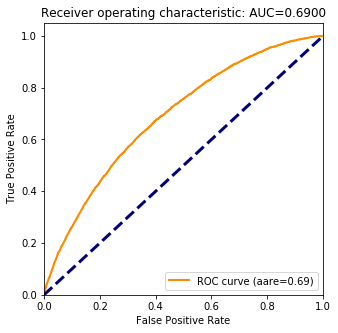

In [34]:
ROC_LIFT(rf_v1,test_hex,'loan_default')

## Sampling + random forest

### (1) Random Under Sampling

In [6]:
y = df[target]
X = df.drop(target,axis=1)
y.dtypes

dtype('int64')

In [7]:
y1_cnt = df[target].sum()
y1_cnt

15488

In [8]:
N = 2
y0_cnt = y1_cnt * N
y0_cnt

30976

In [9]:
from imblearn.datasets import make_imbalance
X_rs, y_rs = make_imbalance(X, y, 
                            sampling_strategy={1:y1_cnt , 0:  y0_cnt},
                            random_state=0)
X_rs = pd.DataFrame(X_rs)
y_rs = pd.DataFrame(y_rs)    

In [12]:
y_rs = df[df[target]==1]
X_rs = df[df[target]==0].sample(n=y0_cnt)
smpl = pd.concat([X_rs,y_rs])
smpl_hex2 = h2o.H2OFrame(smpl)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [34]:
smpl_hex2.shape

(46464, 89)

In [21]:
rf_v2 = H2ORandomForestEstimator(
        model_id = 'rf_v2',
        ntrees = 300,
        nfolds=10,
        min_rows=100,
        seed=1234)
rf_v2.train(predictors,target,training_frame=smpl_hex2)

drf Model Build progress: |███████████████████████████████████████████████| 100%


drf prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,3200,1470,1730,3200,1470,1730,0.24,0.07,617.5,2.38,17.0,45.94
1,3200,1080,2120,6400,2550,3850,0.41,0.15,1235.0,2.06,26.0,39.84
2,3200,898,2302,9600,3448,6152,0.56,0.24,1852.5,1.86,32.0,35.92
3,3200,695,2505,12800,4143,8657,0.67,0.34,2470.0,1.68,33.0,32.37
4,3200,592,2608,16000,4735,11265,0.77,0.44,3087.5,1.53,33.0,29.59
5,3200,505,2695,19200,5240,13960,0.85,0.54,3705.0,1.41,31.0,27.29
6,3200,364,2836,22400,5604,16796,0.91,0.65,4322.5,1.30,26.0,25.02
7,3200,288,2912,25600,5892,19708,0.95,0.76,4940.0,1.19,19.0,23.02
8,3200,208,2992,28800,6100,22700,0.99,0.88,5557.5,1.10,11.0,21.18


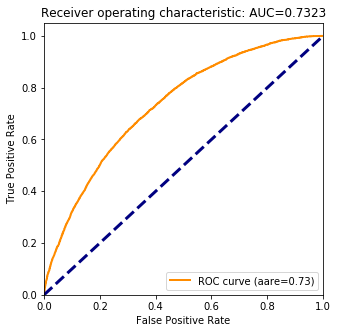

In [22]:
ROC_LIFT(rf_v2,test_hex,'loan_default')

### (2) Random Oversampling

In [23]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')

In [24]:
y_train = train['loan_default'].copy()
train_over, y_over = oversample.fit_sample(train, y_train)

In [25]:
from collections import Counter
Counter(y_over)

Counter({0: 38687, 1: 38687})

In [26]:
smpl_hex3 = h2o.H2OFrame(train_over)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [32]:
smpl_hex3.shape

(77374, 89)

In [35]:
rf_over = H2ORandomForestEstimator(
        model_id = 'rf_over',
        ntrees = 300,
        nfolds=10,
        min_rows=100,
        seed=1234)
rf_over.train(predictors,target,training_frame = smpl_hex3)

drf Model Build progress: |███████████████████████████████████████████████| 100%


drf prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,3200,1290,1910,3200,1290,1910,0.21,0.07,617.5,2.09,14.0,40.31
1,3200,996,2204,6400,2286,4114,0.37,0.16,1235.0,1.85,21.0,35.72
2,3200,859,2341,9600,3145,6455,0.51,0.25,1852.5,1.70,26.0,32.76
3,3200,695,2505,12800,3840,8960,0.62,0.35,2470.0,1.55,27.0,30.00
4,3200,579,2621,16000,4419,11581,0.72,0.45,3087.5,1.43,27.0,27.62
5,3200,542,2658,19200,4961,14239,0.80,0.55,3705.0,1.34,25.0,25.84
6,3200,438,2762,22400,5399,17001,0.87,0.66,4322.5,1.25,21.0,24.10
7,3200,373,2827,25600,5772,19828,0.93,0.77,4940.0,1.17,16.0,22.55
8,3200,252,2948,28800,6024,22776,0.98,0.88,5557.5,1.08,10.0,20.92


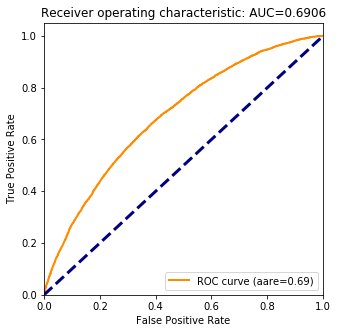

In [36]:
ROC_LIFT(rf_over,test_hex,'loan_default')

The model using random undersampling method outperform the orignal model and oversampling model. Hence I start grid search and cross validation for this model.

## Grid Search + Cross Validation

In [25]:
from h2o.grid.grid_search import H2OGridSearch

hyper_parameters = {'ntrees':[100, 200, 500], 
                    'max_depth':[10, 20, 50]}

In [26]:
rf_v4 = H2ORandomForestEstimator(
    stopping_rounds = 10,
    stopping_tolerance = 0.00001,
    stopping_metric = 'auto',
    seed = 1)

criteria = {"strategy": "RandomDiscrete", 
            "stopping_rounds": 10,
            "stopping_tolerance": 0.00001,
            "stopping_metric": "misclassification"}

grid_search = H2OGridSearch(model = rf_v4, 
                            hyper_params = hyper_parameters,
                            search_criteria = criteria)

In [27]:
grid_search.train(x = predictors,
                  y = target,
                  training_frame = smpl_hex2,
                  validation_frame = test_hex)

drf Grid Build progress: |████████████████████████████████████████████████| 100%


In [28]:
best_max_depth  = grid_search.sorted_metric_table()['max_depth'][0]
best_ntrees     = grid_search.sorted_metric_table()['ntrees'][0]
best_max_depth, best_ntrees 

('50', '500')

In [29]:
best_rf = H2ORandomForestEstimator(
    model_id = "best_rf",
    ntrees = 500,
    max_depth = 50,
    nfolds=10,
    min_rows=100,
    seed=1234)

In [30]:
best_rf.train(predictors,target,training_frame = smpl_hex2)

drf Model Build progress: |███████████████████████████████████████████████| 100%


drf prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,3200,1460,1740,3200,1460,1740,0.24,0.07,617.5,2.36,17.0,45.62
1,3200,1095,2105,6400,2555,3845,0.41,0.15,1235.0,2.07,26.0,39.92
2,3200,874,2326,9600,3429,6171,0.56,0.24,1852.5,1.85,32.0,35.72
3,3200,724,2476,12800,4153,8647,0.67,0.33,2470.0,1.68,34.0,32.45
4,3200,576,2624,16000,4729,11271,0.77,0.44,3087.5,1.53,33.0,29.56
5,3200,500,2700,19200,5229,13971,0.85,0.54,3705.0,1.41,31.0,27.23
6,3200,401,2799,22400,5630,16770,0.91,0.65,4322.5,1.30,26.0,25.13
7,3200,279,2921,25600,5909,19691,0.96,0.76,4940.0,1.20,20.0,23.08
8,3200,187,3013,28800,6096,22704,0.99,0.88,5557.5,1.10,11.0,21.17


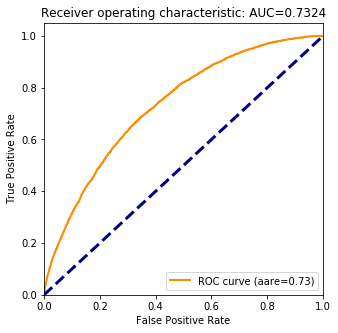

In [31]:
ROC_LIFT(best_rf,test_hex,'loan_default')

## Summary

The performance of Random Forest Model improved slightly with grid search and Cross Validation. Total improvement is from 0.6906 to 0.7324.